# Problem Set 3
## Running and Interpreting Regressions
## Due Date: Friday 3/8, 8:00 AM

Put picture / instructions / grading info here.

In [49]:
import random
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

## Problem 1: Recognizing Patterns in the Data

The two graphs below shows the empirical distribution for daily earnings for 10,000 individuals (these are simulated rather than real data points).  The first graph shows the distribution for all workers pooled.  The second graph shows three separate distributions where workers are stratified into three separate skill groups: low skilled, medium skilled, and high skilled.

/Users/ToddFaulkenberry/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


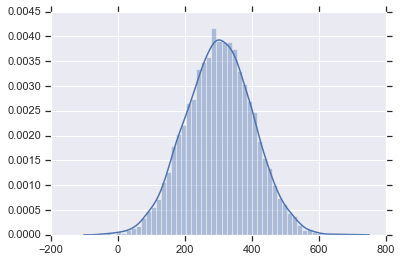

In [2]:
## Simulating random data
daily_earnings = [random.gauss(300, 100) for x in range(10000)]

## Setting up plot
sns.distplot(daily_earnings);

/Users/ToddFaulkenberry/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


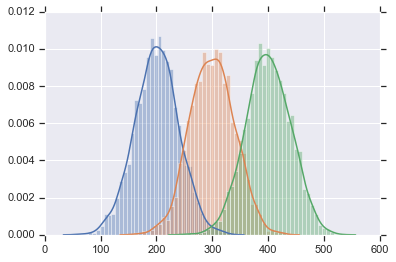

In [3]:
skill_low = [random.gauss(200, 40) for x in range(3334)]
skill_med = [random.gauss(300, 40) for x in range(3333)]
skill_high = [random.gauss(400, 40) for x in range(3333)]

sns.distplot(skill_low)
sns.distplot(skill_med)
sns.distplot(skill_high);

**Part 1**: Comparing these two graphs, does this stratification seem meaningful?  That is to say, does stratifying the sample by skill group explain variance in daily earnings?  Why or why not?

*Answer here*

**Part 2**: Suppose you wished to formally test the hypothesis that mean earning differ across these three groups. How would you do so?  Be explicit in terms of formally stating the hypothesis, how you would construct the test statistic and which distribution you would use.  Suppose you have 3,334 observations for low skilled workers, and 3,333 for medium and high skilled workers.  

*Answer here*

**Part 3**: In our discussion of the bivariate model, we laid out a series of assumptions regarding the data generating process that we are assuming to be true when we fit a bivariate regression model.  These assumptions include that the population regression function is linear in the x variable and a host of assumptions regarding the error term of the equation that generates the data.  The following two graphs (again using data I simulated) display scatter plots and fitted bivariate regression lines for two separate relationships.  In each, one of the assumptions that we commonly make is violated.  **Identify and describe the violation for each graph**.

In [37]:
# Create a heteroscedastic graph here

*Answer here*

In [ ]:
# Create a graph with uneven residuals here

*Answer here*

The graph below presents a scatter plot of the number of recorded earthquakes that are magnitude 8.0 or higher for each year between 1916 and 2015.  The data also shows a fitted regression line displaying the linear trend in large earthquakes (note, this is actual and not simulated data).  I have connected consecutive data points by a line to visibly connect consecutive annual counts of large earthquakes.  Again, one of the assumptions that we commonly make regarding the data generating process is violated in this graph.  **Which one?  What does this violation mean in terms of predicting patterns in seismic activity?**

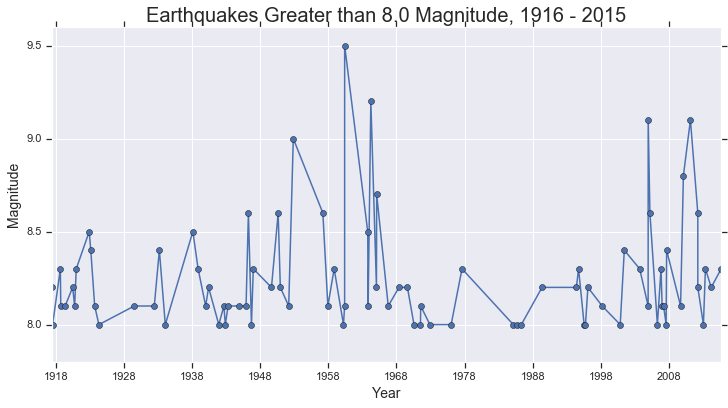

In [36]:
# Reading in data
earthquakes = pd.read_csv('earthquake.csv')

# Converting time column to datetime object
earthquakes['time'] = pd.to_datetime(earthquakes['time'])

# Filtering the dataset to only earthquakes larger than 8.0
earthquakes_eight = earthquakes[earthquakes['mag'] >= 8.0]

# Setting up figure
plt.figure(figsize=(12,6))

# Plotting figure
plt.plot(earthquakes_eight['time'], earthquakes_eight['mag'], marker = 'o')

# Adjusting figure presentation
plt.title('Earthquakes Greater than 8.0 Magnitude, 1916 - 2015', fontsize = 20)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Magnitude', fontsize = 14);

# Would like to agg a line of best fit
# Would like to get space between title and plot

*Answer here*

## Problem 2: Testing for a Difference in Means

Using the earthquake data, I created a dummy variable equal to one for all years after 1965.  This splits the sample into 50 early years and 50 later years. The table below presents the results of running a t-test on that dummy variable:

In [58]:
# Creating dummy variable where 1966 and later is 1, 1965 and earlier is 0
earthquakes['years66plus'] = np.where(earthquakes['time'] >= pd.to_datetime('1966-01-01 00:00:00'), 1, 0)

# Separating data based on dummy
earthquakes_pre = earthquakes[earthquakes['years66plus'] == 0]
earthquakes_post = earthquakes[earthquakes['years66plus'] == 1]

# Running basic t-test
stats.ttest_ind(earthquakes_pre['mag'], earthquakes_post['mag'], equal_var = True)

# Need to adjust this so it puts out more information for 3/4
# or just make clear that that they need to grab that information on their own

Ttest_indResult(statistic=1.7117241477977345, pvalue=0.087192242234806316)

**Part 1**: What hypothesis am I testing exactly by running this command?  (State it in terms of a null and alternative.)

*Answer here*

**Part 2**: Using a two-tailed test, what is the likelihood of observing the differences in average annual earthquakes under the null hypothesis of no difference? 

*Answer here*

**Part 3**: Compare the confidence intervals for the average number of quakes in the early years and the later years.  What do you notice about these two intervals that strongly suggests that there is a statistically significant difference in average earthquakes across these two time periods?

*Answer here*

**Part 4**: Using the standard deviation estimates and the sample size estimates, calculate the standard error for the average for each year grouping (*Note: The answer is in the output, so you should be able to directly verify that have calculated the correct answer.  You should use the formulas presented in lecture 2*).

*Answer here*

## Problem 3: Comparing Bivariate and Multivariate Regression Results

The figure below shows three scatter plots (these are simulated rather than actual data).  Suppose the data pertains to full time workers in the U.S. between the ages of 30 and 50.  

1. The first scatter plot shows annual earnings against the percent of people who are poor in one’s zip code of residence at birth.  
2. The second scatter plot shows the relationship between one’s annual earnings as an adult and the educational attainment of each person’s mother as recorded on their birth certificate.  
3. The final scatter plot shows the relationship between percent poor in birth zip code and mother’s education.  

From these three figures we see that...
1. People born into poor zip codes tend to have lower earnings as an adult;
2. People with more educated mothers make more money as adults; and
3. People with more educated mothers tend to be raised in wealthier zip codes.

In [39]:
# Scatter plots here

**Part 1**: Suppose we first run a regression of annual earnings on the poverty rate in one’s birth zip code.  The output from this regression follows:

In [40]:
# Regression here

We then run a second regression where the dependent variable is again annual earnings but our control variables include both poverty in birth zip code as well as maternal educational attainment.  Using the omitted variables formula, what do you predict will be the effect of adding a control for maternal education on our estimate of the marginal effect of higher poverty in one’s birth zip on adult earnings?  Alternatively stated, how will the coefficient on zip poverty rates differ in these two regressions?

*Answer here*

**Part 2**: The output below presents the regression output from a model where the dependent variable is the annual earnings and the two explanatory variables are the percent poor in one’s birth zip code and maternal educational attainment.  Using this output, how many additional years of maternal education would it take to offset the disadvantage of growing up in a zip code that is 100 percent poor relative to a zip code is 0 percent poor?  **(Remembers, this regression is estimated using a simulated (i.e., made up) data set.  So please do not read anything into the actual numbers)**.

*Answer here*

**Part 3**: Compare the output from these two regressions:

- Why is the root mean square error smaller in the multivariate regression relative to the bivariate regression?
- Why is the total sum of squares the same in both regressions?
- The standard error for the coefficient on zip_poverty is larger in the multivariate regression than in the bivariate regression.  However, the root mean square error (the numerator in the equation for the standard error for this coefficient) is smaller in the multivariate equation?  How can this be?
- Describe the simple hypothesis test that would basically test the first model against the second (note the first model is nested within the second in that you can impose a restriction on the parameters of the second model that would leave us with the first).  Can you reject the model of the simple bivariate model in favor of the multivariate model using the output above?

*Answer here*

## Problem 4: Analyzing Gender Differentials in Weekly Earnings

**Note: This section is more barebones than in the problem set, where Steve dedicates a little bit of time to explaining how to upload the data and then how to run regressions. Could create interactive example to replace that.**

The data set from this question is an extract from the 2000 March Current Population Survey and contains data on weekly earnings, gender, age, age squared, and a set of dummy variables indicating level of educational attainment for approximately 13,000 randomly selected working adults in the United States.

In [64]:
cps_march = pd.read_csv('ps3data.csv')


cps_march.shape

(12987, 9)

In [65]:
cps_march.head()

,Weeklyearnings,female,age,agesquared,dropout,hsgrad,somecoll,collgrad,collplus
0,1.0,1,22,484,0,1,0,0,0
1,1.0,0,54,2916,0,0,1,0,0
2,1.0,1,53,2809,0,0,0,1,0
3,1.0,0,53,2809,0,0,1,0,0
4,2.0,1,49,2401,0,0,0,1,0


Using this dataset, do the following:

**Part 1**: Calculate the sample averages of all of the variables in the data set.  For the dummy variables in the data set, what are these averages telling us?  

*Answer here*

**Part 2**: Estimate a regression where the dependent variable is weekly earnings and the only independent variable is a female dummy variable.  What is the mean difference in earnings between men and women?

*Answer here*

**Part 3**: Add age, age squared, and the educational-attainment dummy variables to the previous specification.  Do gender differences in age and education explain the gender earnings differential?

*Answer here*

**Part 4**: Interact the female dummy variable with all of the other explanatory variables in the regression and add these interaction terms to the specification.  Do the returns (that is to say, the effects) to education and age differ by gender?  What happens to the coefficient on female?

*Answer here*

**Part 5**: Test the null hypothesis that the effects of education and age are the same for men and women. (You’ll need to use an F-test). 

*Answer here*

**Part 6**: Use the final specification to predict the earnings of...

1. A 30 year old women with a high school degree
2. A 30 year old women with a college degree
3. A 40 year old women with a college degree
4. A 30 year old man with a high school degree
5. A 30 year old man with a college degree, and 
6. A 40 year old man with a college degree.  

What do the prediction indicate happens to the gender earnings differential as educational attainment increases (holding age constant) and as age increases (holding educational attainment constant)?

*Answer here*